<a href="https://colab.research.google.com/github/Sabrina-Hendricks/DS4002-Group13-Project3/blob/main/Scripts/DataAppendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define the base URL for your GitHub repository
base_url = 'https://raw.githubusercontent.com/Sabrina-Hendricks/DS4002-Group13-Project3/main/Data'

# List of breeds (directories)
breeds = ['Beagle', 'Boxer', 'Bulldog', 'Chihuahua', 'Chow', 'CockerSpaniel',
          'Doberman', 'GermanShepherd', 'Golden', 'GreatDane', 'Husky', 'Lab',
          'Pomeranian', 'Pug', 'Rottweiler', 'SaintBernard', 'Shih-tzu', 'StandardPoodle', 'StandardSchnauzer', 'Whippet']  # Add other breeds as needed

# Initialize lists to store the image URLs and labels
file_urls = []
labels = []

# Construct URLs for each breed
for breed in breeds:
    for i in range(1, 101):
        file_name = f"{breed}_{i}.jpg"  # Assumes file names follow this convention, e.g., 'Beagle_1.jpg'
        file_url = f"{base_url}/{breed}/{file_name}"

        file_urls.append(file_url)
        labels.append(breed)

# Create a DataFrame with the URLs and labels
df = pd.DataFrame({
    'file_url': file_urls,
    'label': labels
})

# Display the DataFrame
df.head()


,file_url,label
0,https://raw.githubusercontent.com/Sabrina-Hend...,Beagle
1,https://raw.githubusercontent.com/Sabrina-Hend...,Beagle
2,https://raw.githubusercontent.com/Sabrina-Hend...,Beagle
3,https://raw.githubusercontent.com/Sabrina-Hend...,Beagle
4,https://raw.githubusercontent.com/Sabrina-Hend...,Beagle


In [ ]:
df['file_url'].describe()

,file_url
count,2000
unique,2000
top,https://raw.githubusercontent.com/Sabrina-Hend...
freq,1


In [ ]:
df['label'].describe()

,label
count,2000
unique,20
top,Beagle
freq,100


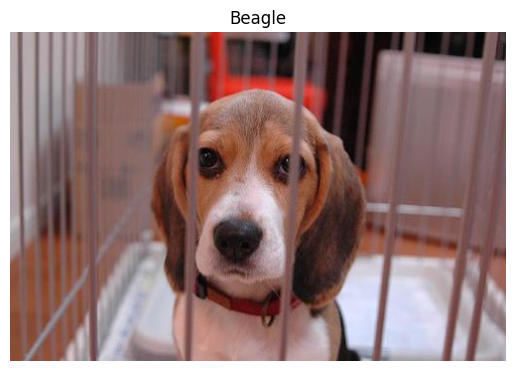

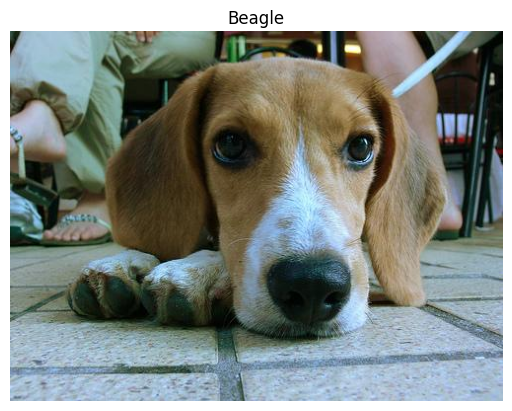

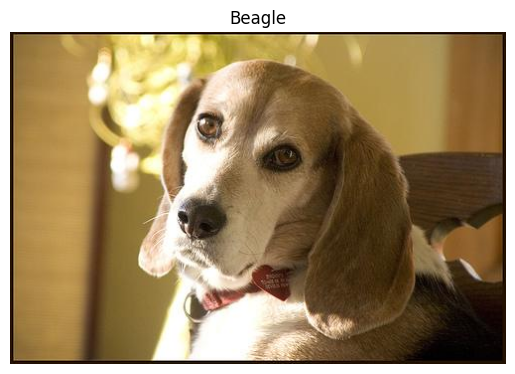

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Function to fetch and display an image from a URL
def fetch_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

for i in range(3):  # Display first 3 images as an example
    img = fetch_image(df['file_url'].iloc[i])
    plt.imshow(img)
    plt.title(df['label'].iloc[i])
    plt.axis('off')
    plt.show()

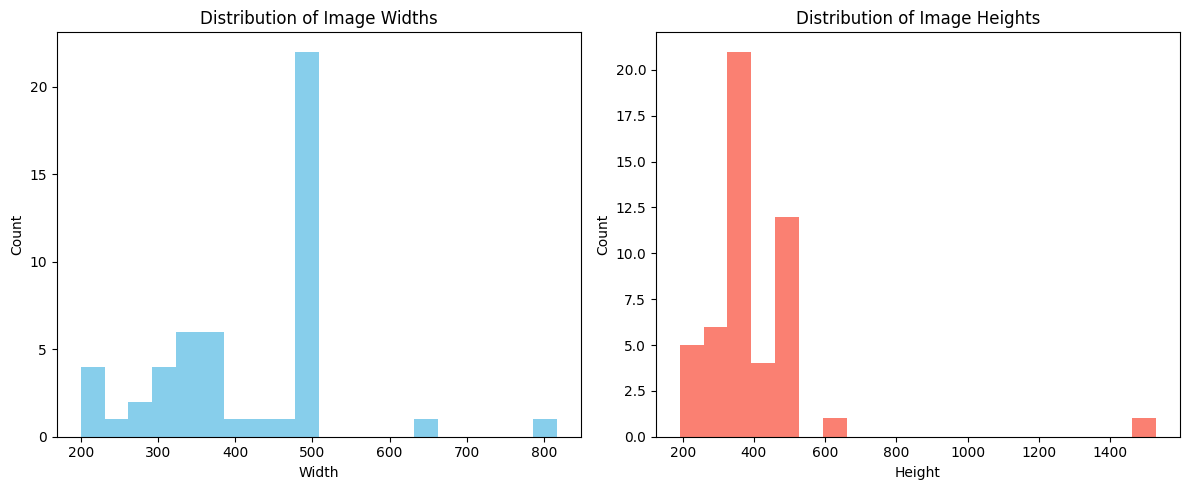

In [ ]:
image_sizes = []

for url in df['file_url'].sample(50):  # Sample 50 images for analysis
    img = fetch_image(url)
    image_sizes.append(img.size)  # (width, height)

# Convert to a DataFrame for easier plotting
size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Plot the distribution of image widths and heights
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(size_df['Width'], bins=20, color='skyblue')
plt.title("Distribution of Image Widths")
plt.xlabel("Width")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(size_df['Height'], bins=20, color='salmon')
plt.title("Distribution of Image Heights")
plt.xlabel("Height")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

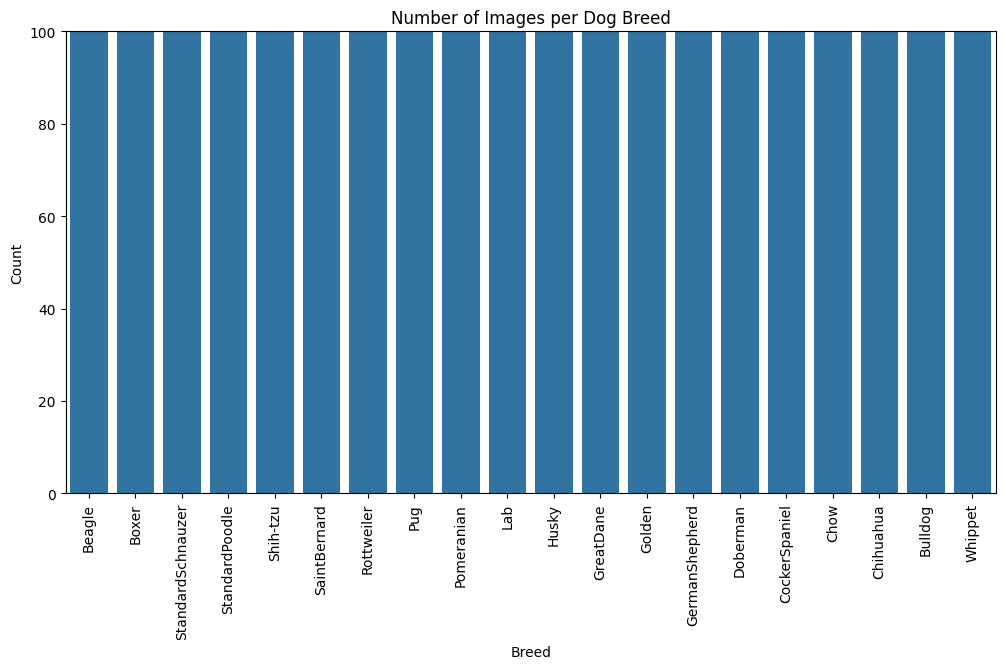

In [ ]:
import seaborn as sns

# Count the number of images per breed
breed_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=breed_counts.index, y=breed_counts.values)
plt.title("Number of Images per Dog Breed")
plt.xticks(rotation=90)
plt.xlabel("Breed")
plt.ylabel("Count")
plt.ylim(0, 100)
plt.show()

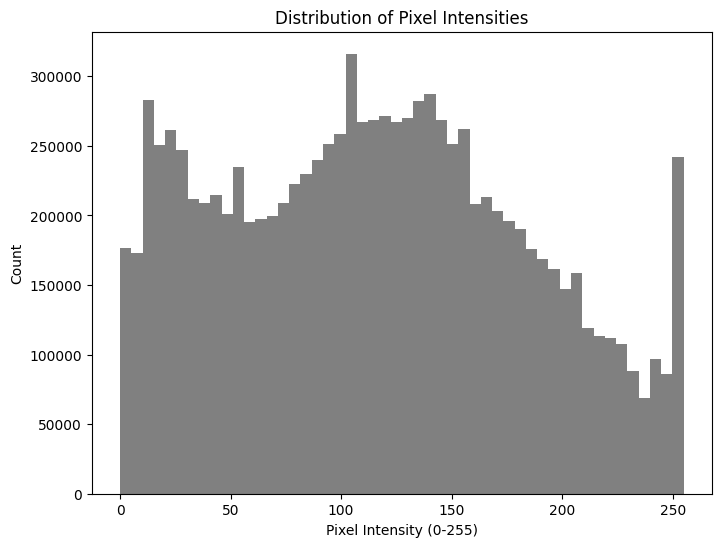

In [ ]:
import numpy as np

intensities = []

for url in df['file_url'].sample(50):  # Sample 50 images for analysis
    img = fetch_image(url).convert('L')
    intensities.extend(np.array(img).flatten())

# Plot the distribution of intensities
plt.figure(figsize=(8, 6))
plt.hist(intensities, bins=50, color='gray')
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Count")
plt.show()
